In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')

### 8.1 차원의 저주

데이터의 차원이 증가할수록 데이터 포인트 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습 하게되면 모델이 복잡해지게 된다. 따라서, 오버피팅(overfitting) 위험이 커진다. 

이러한 차원의 저주를 해결하기 위한 방법 중 하나는 데이터의 밀도가 높아질 때까지 학습 데이터셋의 크기를 늘리는 것이다. 하지만, 데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든일이라 할 수 있다.

### 8.2 차원 축소를 위한 접근 방법

##### 8.2.1 투영

- 투영 : 고차원 공간에서 저차원 **부분 공간(subspace)**으로 위치시키는 것

![](./images/projection.png)


##### 8.2.2 매니폴드 학습

대부분의 차원 축소 알고리즘이 이러한 **매니폴드**를 모델링하는 방식으로 동작하며, 이를 **매니폴드 학습(Manifold Learning)** 이라고 한다. 매니폴드 학습은 **매니폴드 가정**(manifold assumption) 또는 **매니폴드 가설**(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정한다.

- 스위스 롤
![](./images/manifold02.png)

![](./images/manifold03.png)

![](./images/manifold04.png)

따라서, 모델을 학습시키기 전에 학습 데이터셋의 차원을 감소시키면 학습 속도는 빨라지지만 모델의 성능은 항상 더 낫거나 간단한 모델이 되는 것은 아니다. 이것은 데이터셋이 어떠한 모양을 하고 있느냐에 따라 달라진다.

### 8.3 PCA

**주성분 분석(PCA**, Principal Component Analysis**)**은 가장 대표적인 차원 축소 알고리즘이다. PCA는 먼저 데이터에 가장 가까운 초평면(hyperplane)을 구한 다음, 데이터를 이 초평면에 투영(projection)시킨다.

##### 8.3.1 분산 보존

![](./images/pca01.png)

- PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 **평균제곱거리**를 **최소화** 하는 축을 찾는다.

##### 8.3.2 주성분

PCA는 다음과 같은 단계로 이루어진다. 

1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
4. `1~3`과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

###### 8.3.3 d차원으로 투영하기

##### 8.3.4 사이킷런 사용하기

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

##### 8.3.5 설명된 분산의 비율

In [5]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

##### 8.3.6 적절한 차원 수 선택하기

- 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산

In [16]:
# 방법 1
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
pca.fit(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


In [17]:
# 방법 2
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


##### 8.3.7 압축을 위한 PCA

In [18]:
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# reshape
train_x = train_x.reshape(-1, 28*28) 

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

In [22]:
print('원래 차원 수 :', train_x.shape[1])
print('압축 후 차원 수 :', pca.n_components_)

원래 차원 수 : 784
압축 후 차원 수 : 154


##### 8.3.8 점진적 PCA

- 점진적 PCA(Incremental PCA) : 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다.

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    inc_pca.partial_fit(batch_x)

X_reduced = inc_pca.transform(train_x)

##### 8.3.9 랜덤 PCA

Scikit-Learn의 `PCA`에서는 **Randomized PCA**를 제공한다. 이 방법은 첫 $d$개의 주성분에 대해 근사값을 빠르게 찾는다.

In [28]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(train_x)

In [29]:
X_reduced.shape

(60000, 154)

### 8.4 커널 PCA

- **Kernel PCA**(KPCA) : 비선형 투영으로 차원을 축소하는 것
- 여러 가지 커널의 kPCA를 사용해 2D로 축소시킨 스위스 롤

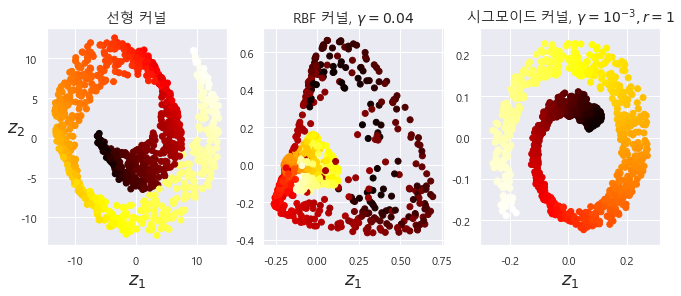

In [33]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

### 8.5 LLE

- 지역 선형 임베딩(Locally Linear Embedding) : **비선형 차원 축소** 기술
    - 투영에 의존하지 않는 매니폴드 학습

- Step
    1. k개의 가까운 이웃 찾기
    2. 선형적으로 연관있는지 확인
    3. 저차원으로 매핑
    
![](./images/LLE.png)

### 8.6 다른 차원 축소 기법

- **다차원 스케일링**(MDS): MDS는 데이터 포인트 간의 거리를 보존하면서 차원을 축소하는 기법이다. 
- **Isomap**: Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인  **geodesic distance**를 유지 하면서 차원을 축소한다.
- **t-SNE**(t-distributed Stochastic Neighbor Embedding): t-SNE는 비슷한 데이터는 가까이, 비슷하지 않은 데이터는 멀리 떨어지도록 차원을 축소한다. 주로 시각화에 많이 사용되며, 특히 고차원 공간에 있는 데이터의 군집을 시각화할 때 사용한다.
- **선형 판별 분석**(LDA): LDA는  Supervised learning이며, 분류 알고리즘에 속한다. LDA는 학습 단계에서 클래스를 가장 잘 구분하는 축을 학습하며, 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다. 이러한 초평면으로 데이터를 투영하게 되면 클래스 간의 거리를 멀리 떨어지게 축소할 수 있다.

In [53]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [54]:
from sklearn.manifold import MDS, Isomap, TSNE

# MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

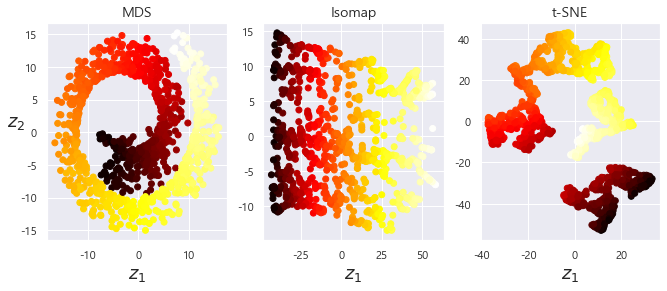

In [55]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()